# 1 - Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# 2 - Import data & cleaning 

In [2]:
# Define path
path = r'C:\Users\Timbr\OneDrive\Desktop\Career Foundry\Data Immersion\Achievement 6'

In [3]:
#import data
df_5on5_10Game_MA = pd.read_csv(os.path.join(path, 'Data', 'Cleaned Data', 'df_nat_stat_trick_5on5_EX65.csv'), index_col=False, low_memory=False, encoding='latin1')

In [4]:
df_5on5_10Game_MA.head()

,Team-Date Combined for Vlookup,team,season,team-season,Game #,gameDate,situation,CF%_MA_10G,FF%_MA_10G,xGF%_MA_10G,SCF%_MA_10G,HDCF%_MA_10G
0,ANA-20081029,Anaheim Ducks,2008.0,Anaheim Ducks-2008,11,20081029,5on5,49.942,47.743,45.280,48.742,45.226
1,ANA-20081031,Anaheim Ducks,2008.0,Anaheim Ducks-2008,12,20081031,5on5,50.289,48.418,46.545,50.005,48.560
2,ANA-20081102,Anaheim Ducks,2008.0,Anaheim Ducks-2008,13,20081102,5on5,49.187,47.003,45.376,48.441,46.428
3,ANA-20081104,Anaheim Ducks,2008.0,Anaheim Ducks-2008,14,20081104,5on5,48.885,46.827,45.858,48.162,47.337
4,ANA-20081105,Anaheim Ducks,2008.0,Anaheim Ducks-2008,15,20081105,5on5,46.761,45.067,44.795,46.201,44.361


In [5]:
df_5on5_10Game_MA.shape

(34010, 12)

In [6]:
df_5on5_10Game_MA

,Team-Date Combined for Vlookup,team,season,team-season,Game #,gameDate,situation,CF%_MA_10G,FF%_MA_10G,xGF%_MA_10G,SCF%_MA_10G,HDCF%_MA_10G
0,ANA-20081029,Anaheim Ducks,2008.0,Anaheim Ducks-2008,11,20081029,5on5,49.942,47.743,45.280,48.742,45.226
1,ANA-20081031,Anaheim Ducks,2008.0,Anaheim Ducks-2008,12,20081031,5on5,50.289,48.418,46.545,50.005,48.560
2,ANA-20081102,Anaheim Ducks,2008.0,Anaheim Ducks-2008,13,20081102,5on5,49.187,47.003,45.376,48.441,46.428
3,ANA-20081104,Anaheim Ducks,2008.0,Anaheim Ducks-2008,14,20081104,5on5,48.885,46.827,45.858,48.162,47.337
4,ANA-20081105,Anaheim Ducks,2008.0,Anaheim Ducks-2008,15,20081105,5on5,46.761,45.067,44.795,46.201,44.361
...,...,...,...,...,...,...,...,...,...,...,...,...
34005,WPG-20230405,Winnipeg Jets,2022.0,Winnipeg Jets-2022,78,20230405,5on5,53.704,54.102,55.915,53.851,55.017
34006,WPG-20230408,Winnipeg Jets,2022.0,Winnipeg Jets-2022,79,20230408,5on5,54.921,55.202,57.326,55.590,56.294
34007,WPG-20230410,Winnipeg Jets,2022.0,Winnipeg Jets-2022,80,20230410,5on5,56.698,57.144,59.345,57.640,58.516
34008,WPG-20230411,Winnipeg Jets,2022.0,Winnipeg Jets-2022,81,20230411,5on5,57.376,57.998,60.189,58.464,60.047


In [7]:
df_5on5_10Game_MA.columns

Index(['Team-Date Combined for Vlookup', 'team', 'season', 'team-season',
       'Game #', 'gameDate', 'situation', 'CF%_MA_10G', 'FF%_MA_10G',
       'xGF%_MA_10G', 'SCF%_MA_10G', 'HDCF%_MA_10G'],
      dtype='object')

In [8]:
df_5on5_10Game_MA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34010 entries, 0 to 34009
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team-Date Combined for Vlookup  34010 non-null  object 
 1   team                            34010 non-null  object 
 2   season                          34002 non-null  float64
 3   team-season                     34010 non-null  object 
 4   Game #                          34010 non-null  int64  
 5   gameDate                        34010 non-null  int64  
 6   situation                       34010 non-null  object 
 7   CF%_MA_10G                      34010 non-null  float64
 8   FF%_MA_10G                      34010 non-null  float64
 9   xGF%_MA_10G                     34010 non-null  float64
 10  SCF%_MA_10G                     34010 non-null  float64
 11  HDCF%_MA_10G                    34010 non-null  float64
dtypes: float64(6), int64(2), object(

In [9]:
df_5on5_10Game_MA.dtypes

Team-Date Combined for Vlookup     object
team                               object
season                            float64
team-season                        object
Game #                              int64
gameDate                            int64
situation                          object
CF%_MA_10G                        float64
FF%_MA_10G                        float64
xGF%_MA_10G                       float64
SCF%_MA_10G                       float64
HDCF%_MA_10G                      float64
dtype: object

In [10]:
df_5on5_10Game_MA.isna().sum()

Team-Date Combined for Vlookup    0
team                              0
season                            8
team-season                       0
Game #                            0
gameDate                          0
situation                         0
CF%_MA_10G                        0
FF%_MA_10G                        0
xGF%_MA_10G                       0
SCF%_MA_10G                       0
HDCF%_MA_10G                      0
dtype: int64

In [11]:
#Checked for duplicates
df_5on5_10Game_MA.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34005    False
34006    False
34007    False
34008    False
34009    False
Length: 34010, dtype: bool

In [12]:
# Create a subset which contains only the stats

stats = df_5on5_10Game_MA[['CF%_MA_10G', 'FF%_MA_10G', 'xGF%_MA_10G', 'SCF%_MA_10G', 'HDCF%_MA_10G']]

# 3 - elbow technique

In [13]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [14]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(stats).score(stats) for i in range(len(kmeans))] 

C:\Users\Timbr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Timbr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Timbr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Timbr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [15]:
#list score
score

[-3514752.817233879,
 -1641497.1721212205,
 -1136496.8463299624,
 -921366.5270420397,
 -805433.0947833755,
 -706728.2395334707,
 -641998.9710238022,
 -587843.6470384246,
 -544146.9009077415]

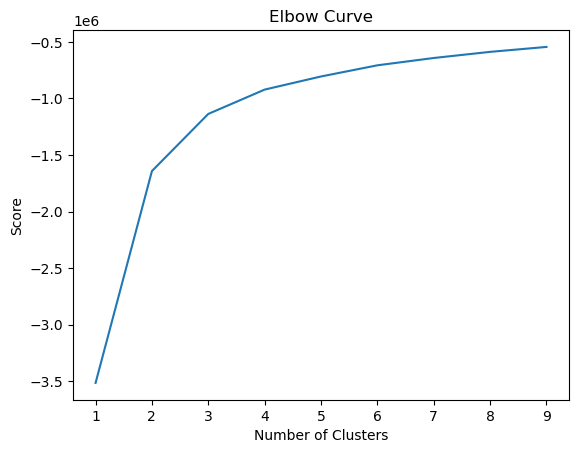

In [16]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4 - Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

The breaking point where the curve starts to flatten out is at 4.  Therefore I believe the optimal number of clusters is 4.

# 5 - k-means algorithm

In [17]:
# Create the k-means object with 4 clusters

kmeans = KMeans(n_clusters = 4)

In [18]:
# Fit the k-means object to the data

kmeans.fit(stats)

C:\Users\Timbr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [19]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column

stats['clusters'] = kmeans.fit_predict(stats)

C:\Users\Timbr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Timbr\AppData\Local\Temp\ipykernel_18136\140332854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['clusters'] = kmeans.fit_predict(stats)


In [20]:
stats.head()

,CF%_MA_10G,FF%_MA_10G,xGF%_MA_10G,SCF%_MA_10G,HDCF%_MA_10G,clusters
0,49.942,47.743,45.280,48.742,45.226,3
1,50.289,48.418,46.545,50.005,48.560,3
2,49.187,47.003,45.376,48.441,46.428,3
3,48.885,46.827,45.858,48.162,47.337,3
4,46.761,45.067,44.795,46.201,44.361,0


In [21]:
# Check the frequency of each unique value in the 'clusters' column

stats['clusters'].value_counts()

clusters
1    11879
3    11281
2     5651
0     5199
Name: count, dtype: int64

# 7 - Create a few different visualizations

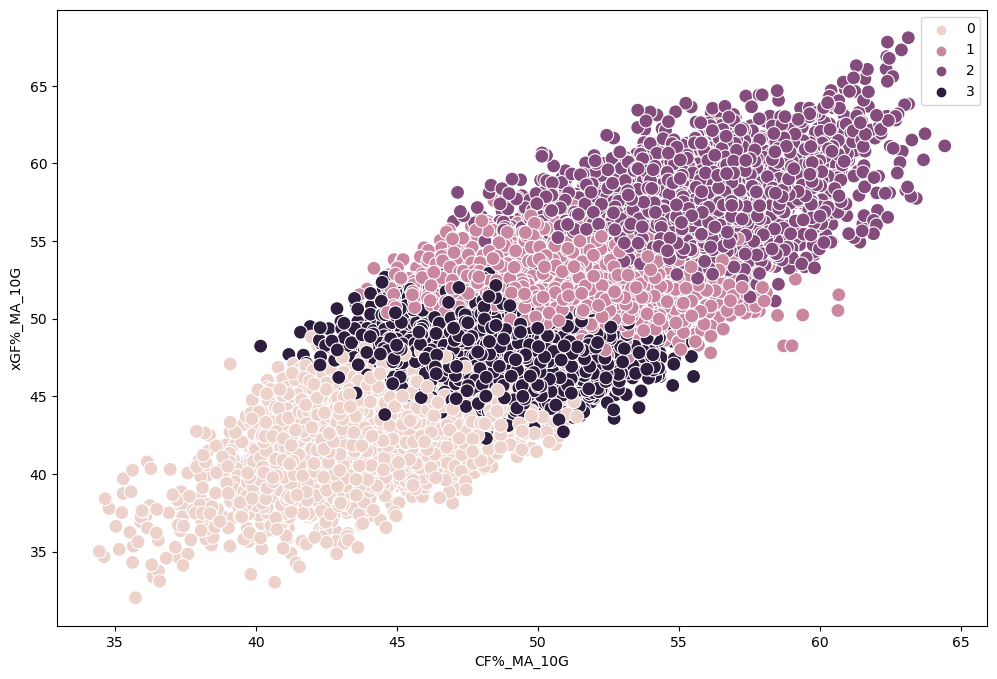

In [22]:
# Plot the clusters for the "CF%_MA_10G" and "CF%_MA_10G" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = stats['CF%_MA_10G'], y = stats['xGF%_MA_10G'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('CF%_MA_10G')
plt.ylabel('xGF%_MA_10G')
plt.show()

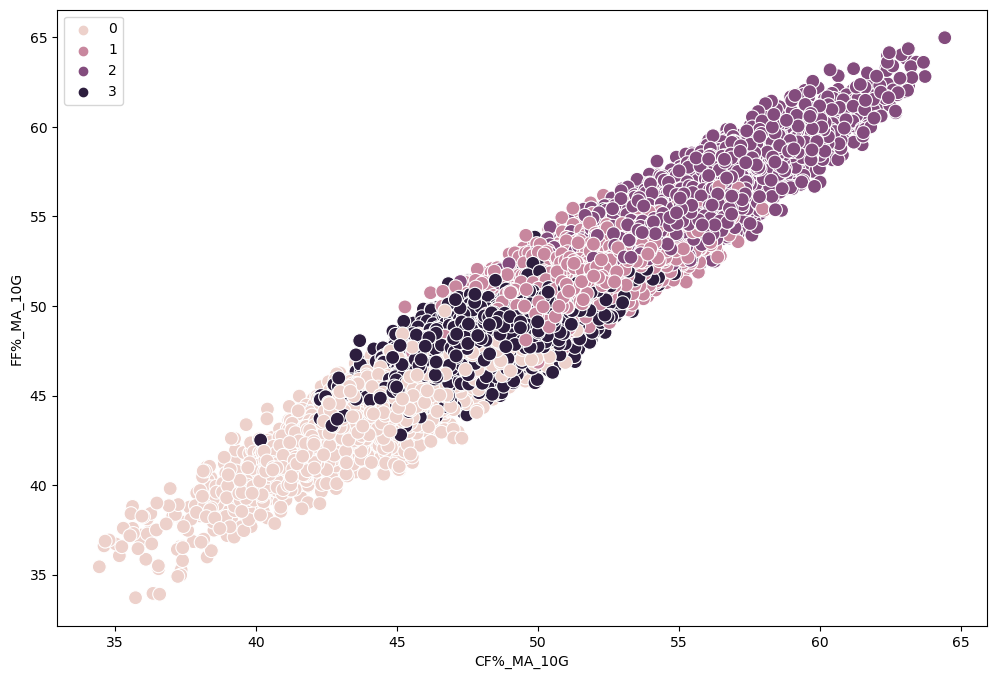

In [23]:
# Plot the clusters for the "CF%_MA_10G" and "FF%_MA_10G" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = stats['CF%_MA_10G'], y = stats['FF%_MA_10G'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('CF%_MA_10G')
plt.ylabel('FF%_MA_10G')
plt.show()

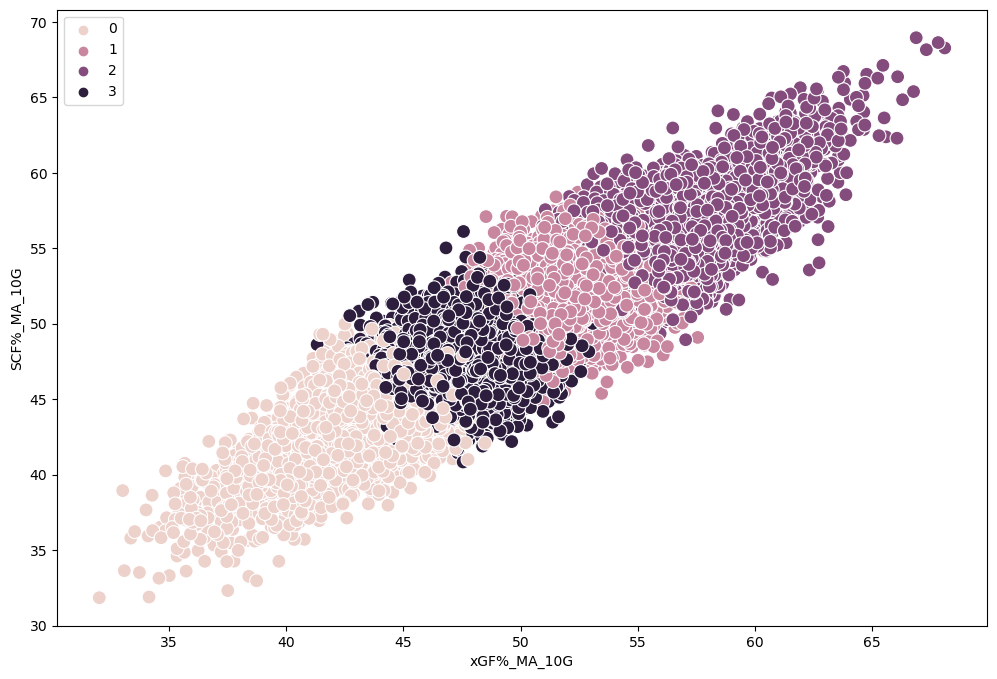

In [24]:
# Plot the clusters for the "xGF%_MA_10G" and "FF%_MA_10G" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = stats['xGF%_MA_10G'], y = stats['SCF%_MA_10G'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('xGF%_MA_10G')
plt.ylabel('SCF%_MA_10G')
plt.show()

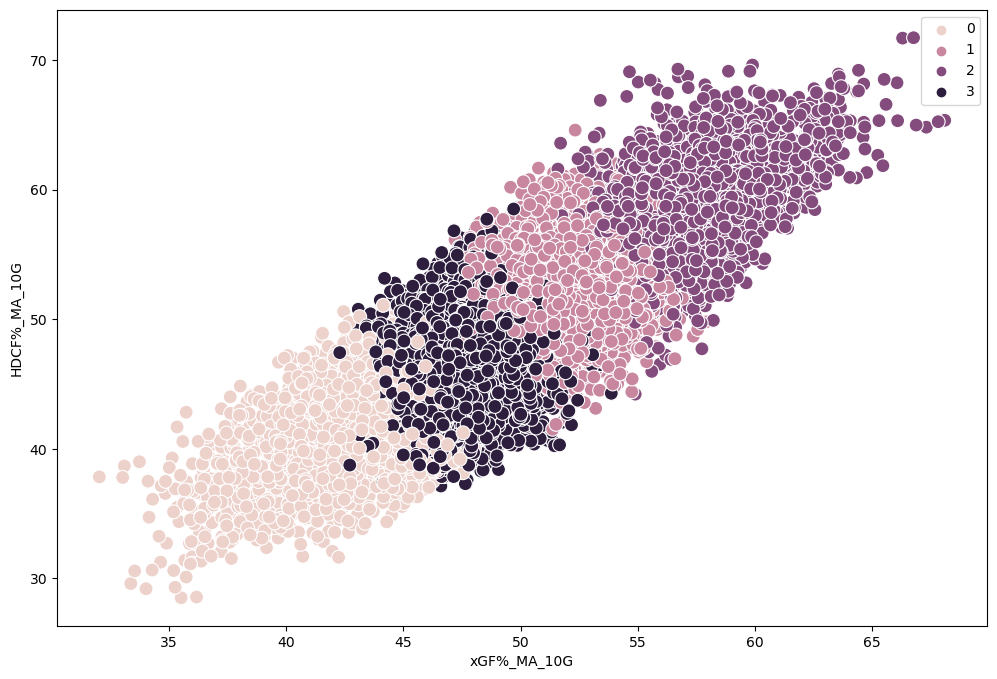

In [25]:
# Plot the clusters for the "xGF%_MA_10G" and "HDCF%_MA_10G" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = stats['xGF%_MA_10G'], y = stats['HDCF%_MA_10G'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('xGF%_MA_10G')
plt.ylabel('HDCF%_MA_10G')
plt.show()

# 8 - Discuss the clusters

Just like the other exercise, all 4 graphs show a positive relationship between each stat.  For example, the higher the Corsi, the higher the expected Goals.  The graph showing FF% & CF% is the tightest, indicating these 2 stats are the closest related of all the stats tested. 

# 9 - descriptive statistics 

In [26]:
#create a column that renames the clusters to colors 
stats.loc[stats['clusters'] == 3, 'cluster'] = 'black'
stats.loc[stats['clusters'] == 2, 'cluster'] = 'dark purple'
stats.loc[stats['clusters'] == 1, 'cluster'] = 'purple'
stats.loc[stats['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Timbr\AppData\Local\Temp\ipykernel_18136\874525086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats.loc[stats['clusters'] == 3, 'cluster'] = 'black'


In [27]:
stats.groupby('cluster').agg({'CF%_MA_10G':['mean', 'median'], 
                         'FF%_MA_10G':['mean', 'median'], 
                        'xGF%_MA_10G':['mean', 'median'],   
                         'SCF%_MA_10G':['mean', 'median'],
                          'HDCF%_MA_10G':['mean', 'median']})

CF%_MA_10G         FF%_MA_10G         xGF%_MA_10G          \
                  mean  median       mean  median        mean  median   
cluster                                                                 
black        48.482204  48.499  48.391277  48.381   47.871514  47.919   
dark purple  54.992797  54.851  55.265483  55.087   56.564317  56.263   
pink         44.779438  44.987  44.561893  44.790   43.227381  43.586   
purple       51.380367  51.417  51.444378  51.444   51.924630  51.881   

            SCF%_MA_10G         HDCF%_MA_10G          
                   mean  median         mean  median  
cluster                                               
black         48.040146  48.042    47.373112  47.386  
dark purple   56.200126  55.970    57.673091  57.474  
pink          43.437397  43.715    42.149121  42.400  
purple        51.826892  51.792    52.349780  52.280

It appears that the black & pink clusters are the most consistent since there is very little difference between the mean & median.  While the dark purple & purple clusters are less consistent, since there is a larger difference between the mean & median.  

# 10 - Propose what these results could be useful for in future steps of an analytics pipeline

The consistency between the clusters as well as their positive relationships can be used to determine which stats are closer related to each other.  This might give us insight as to which stats can help us accurately predict the outcome of future hockey games. 